
# Heart Disease  Prediction


---






This project aims to predict heart diseases using Machine Learning Algorithms.
The algorithms included: 


*   Logistic Regression
*   K-Nearest Neighbour (KNN)
*   Support Vector Machine (SVM)
*   Naive Bayes
*   Decision Tree
*   Random Forest Classification







## Import Libraries

At first, we should import Libraries and necessary Machine Learning Algorithms.

In [70]:
# Basic
# numpy: for working with arrays
import numpy as np
# pandas: for working with dataframes and files : csv, excel ...
import pandas as pd
# matplotlib: creating charts using pyplot
import matplotlib.pyplot as plt
#matplotlib: define parameters using rcParams
from matplotlib import rcParams
#matplotlib: color parameters using rainbow
from matplotlib.cm import rainbow
%matplotlib inline
#ignore all warnings
import warnings
warnings.filterwarnings('ignore')
# seaborn: creating charts 
import seaborn as sns
# Other libraries
#train_test_split: split the dataset into training and testing data
from sklearn.model_selection import train_test_split
#To scale all the features, so that the Machine Learning model better adapts to the dataset
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Data Understanding

The dataset has been taken from Kaagle.

## Import Data

We used **read_csv** to read the dataset and save it into **data** variable.

In [26]:
data = pd.read_csv('Heart_Disease_Prediction.csv')

## Understanding Data

In [8]:
# showing the first five lines
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Our dataset contains 14 columns and 303 rows. \
    **age** : in years\
    **sex** : (1 = male; 0 = female) \
    **cp** : chest pain type \
    **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)\
    **chol** : serum cholestoral in mg/dl \
    **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\
    **restecg** : resting electrocardiographic results\
    **thalach** : maximum heart rate achieved\
    **exang** : exercise induced angina (1 = yes; 0 = no)\
    **oldpeak** : ST depression induced by exercise relative to rest\
    **slope** : the slope of the peak exercise ST segment\
    **ca** : number of major vessels (0-3) colored by flourosopy\
    **thal** : 3 = normal; 6 = fixed defect; 7 = reversable defect\
    **target** : have disease or not 0 = no ; 1= yes
            

In [6]:
#summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
#returns description of the data in the DataFrame
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The describe method revealed that the range of each variable is different. The maximum value of **age** is **77** but for **chol** it is **564** and for **cp** is 1. Thus, feature scaling must be performed on the dataset.








In [10]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

we observed that there are 165 patients who have the disease and 138 patients who don't have the disease. 
  

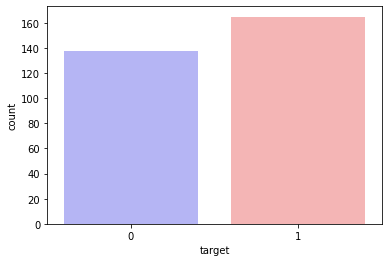

In [14]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [16]:
#number of patients haven't heart disease
countNoDisease = len(data[data.target == 0])
#number of patients have heart disease
countHaveDisease = len(data[data.target == 1])

#Percentage of patients haven't heart disease
PercentageNoDisease =(countNoDisease / (len(data.target))*100)
#Percentage of patients have heart disease
PercentageHaveDisease= (countHaveDisease / (len(data.target))*100)
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format(PercentageNoDisease))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format(PercentageHaveDisease))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%



The percentage of Patients who have heart disease is greater than the percentage of patients who haven't heart disease.



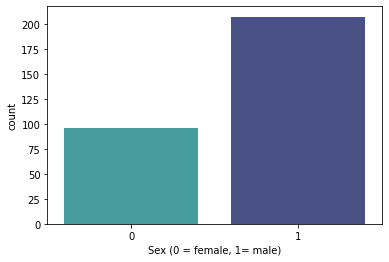

In [18]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [34]:
#number of female patients
countFemalePatients = len(data[data.sex == 0])
# number of male patients
countMalePatients = len(data[data.sex == 1])
#Percentage of female patients
PercentageFemalePatients = (countFemalePatients / (len(data.sex))*100)
#Percentage of male patients
PercentageMalePatients = (countMalePatients / (len(data.sex))*100)
print("Percentage of Female Patients: {:.2f}%".format(PercentageFemalePatients))
print("Percentage of Male Patients: {:.2f}%".format(PercentageMalePatients))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [35]:
df = data[data.target ==1]

In [37]:
df.target.value_counts()

1    165
Name: target, dtype: int64

In [38]:
# count percentage of female Patients who have heart disease

countFemalePatientsHaveDisease = len(df[df.sex == 0])
countMalePatientsHaveDisease = len(df[df.sex == 1])
PercentageFemalePatientsHaveDisease = (countFemalePatientsHaveDisease / (len(df.sex))*100)
PercentageMalePatientsHaveDisease = (countMalePatientsHaveDisease / (len(df.sex))*100)
print("Percentage of Female Patients who have heart disease: {:.2f}%".format(PercentageFemalePatientsHaveDisease))
print("Percentage of Male Patients who have heart disease: {:.2f}%".format(PercentageMalePatientsHaveDisease))

Percentage of Female Patients who have heart disease: 43.64%
Percentage of Male Patients who have heart disease: 56.36%


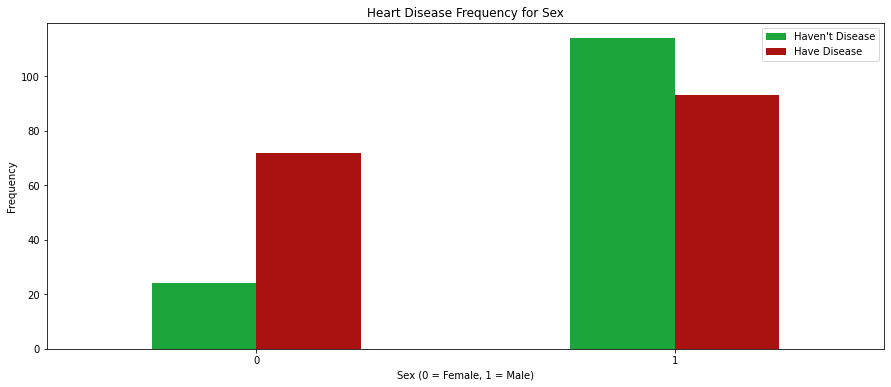

In [40]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

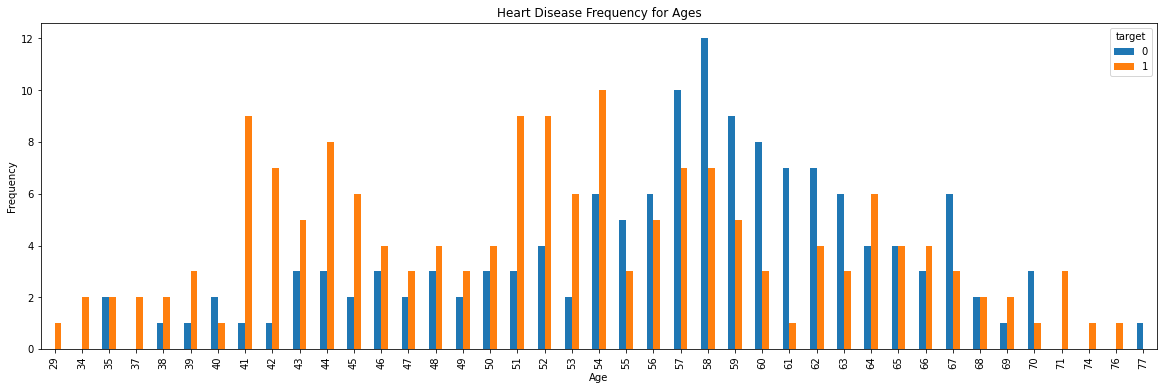

In [39]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

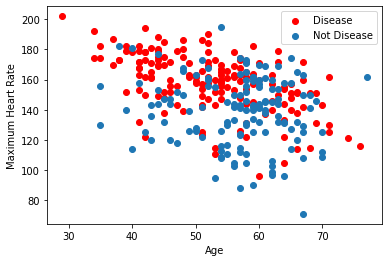

In [41]:
# thalach: maximum heart rate achieved
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

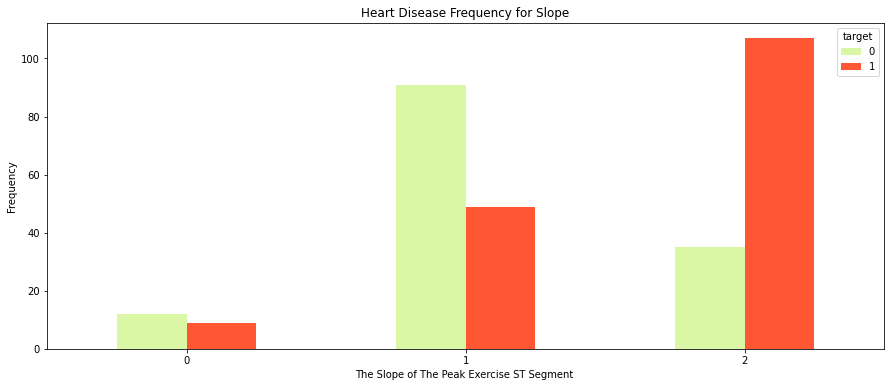

In [42]:
#Slope : 
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

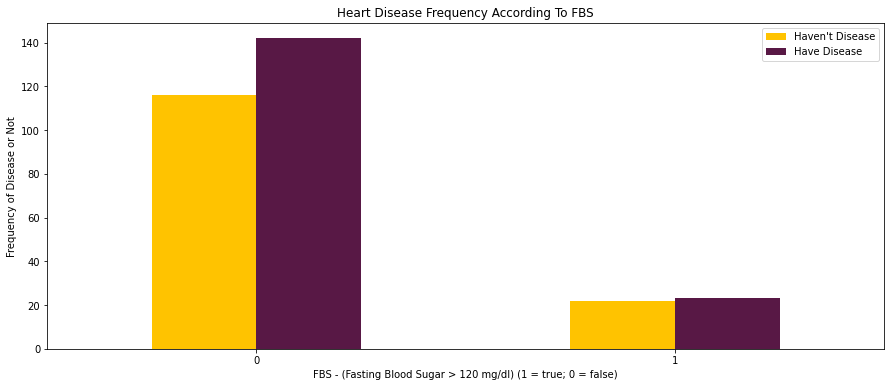

In [44]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

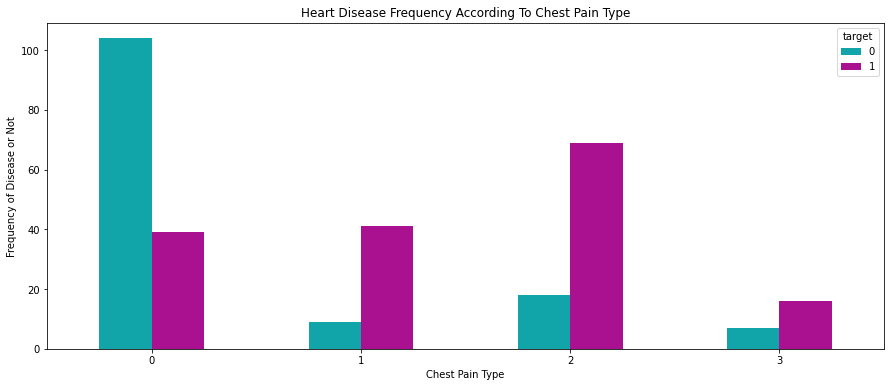

In [45]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Data Preperation

### Creating Dummies Variables




In [47]:
cp = pd.get_dummies(data['cp'], prefix = "cp")
thal = pd.get_dummies(data['thal'], prefix = "thal")
slope = pd.get_dummies(data['slope'], prefix = "slope")

In [50]:
thal


,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [51]:
frames = [data, cp, thal, slope]


In [53]:
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [54]:
df = data.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# Logistic Regression

## Method 1: Creating Model for Logistic Regression



In [55]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

Normalize Data

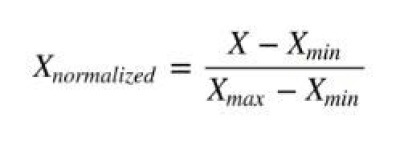

In [56]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [58]:
x.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


We will split our data. 80% of our data will be train data and 20% of it will be test data.



In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [60]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

Let's say weight = 0.01 and bias = 0.0



In [61]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

Sigmoid Function

 
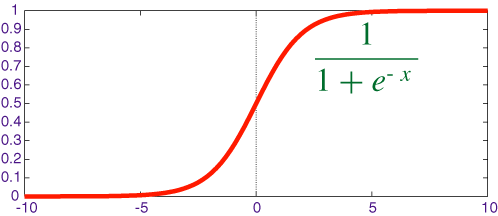

In [62]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

Forward and Backward Propagation


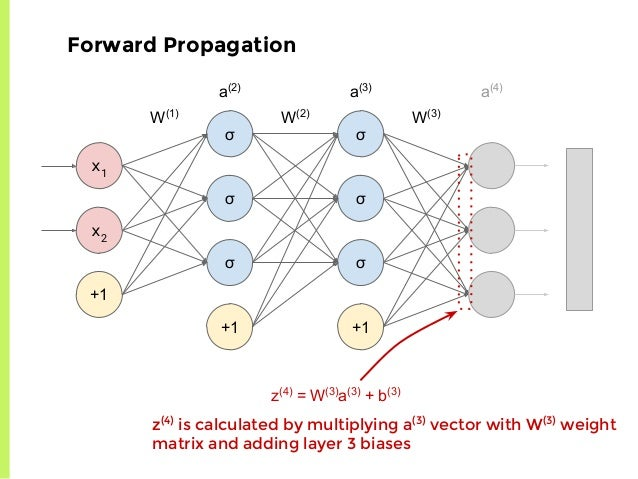

Cost Function


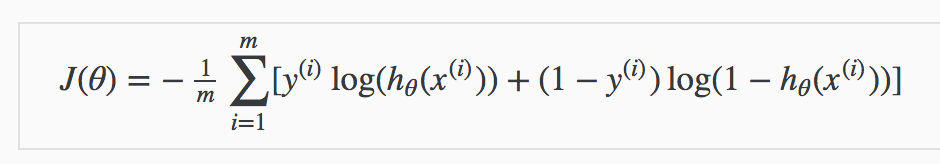

Gradient Descent

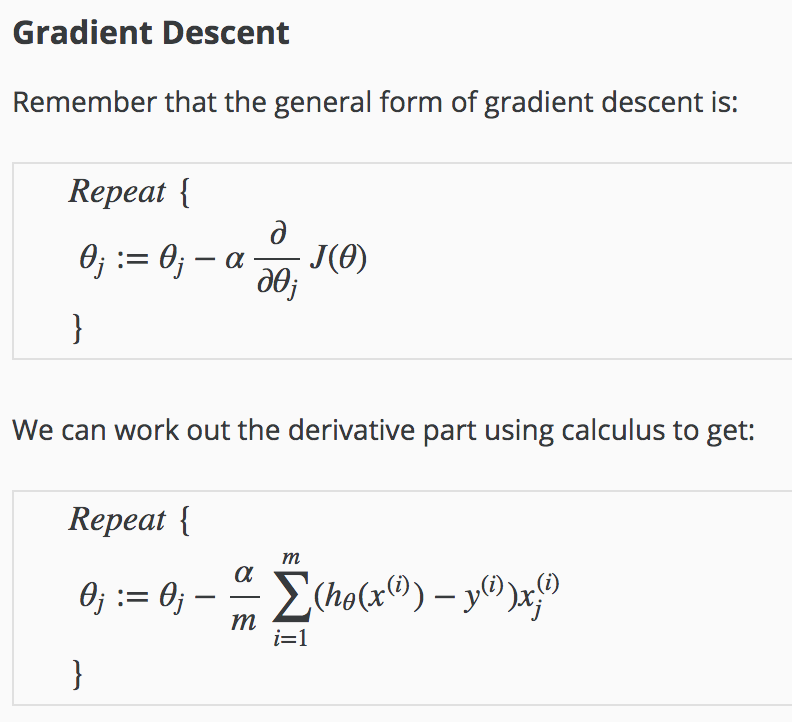

In [ ]:
#h0(x^i)= y_head
#y^i = y_train
#x^i = x_train

In [63]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [64]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [65]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [67]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3597736123664534


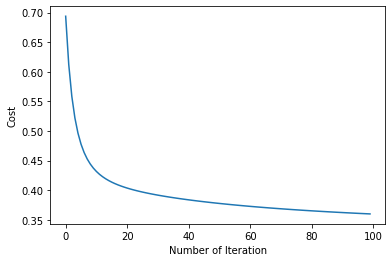

Manuel Test Accuracy: 86.89%


In [68]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

## Method 2: Sklearn Logistic Regression

In [71]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


# K-Nearest Neighbour (KNN) Classification

In [79]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
k=1
knn = KNeighborsClassifier(n_neighbors = k)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(k, knn.score(x_test.T, y_test.T)*100))

1 NN Score: 80.33%


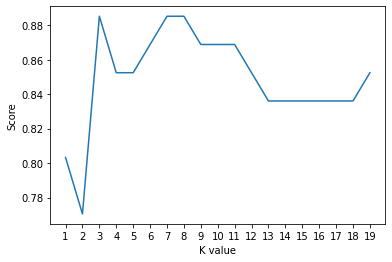

Maximum KNN Score is 88.52%


In [80]:
#find the best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

we will reach the maximum KNN score fo k = 3,7,8

# Support Vector Machine (SVM) Algorithm
\

Support Vector Machine Algorithm

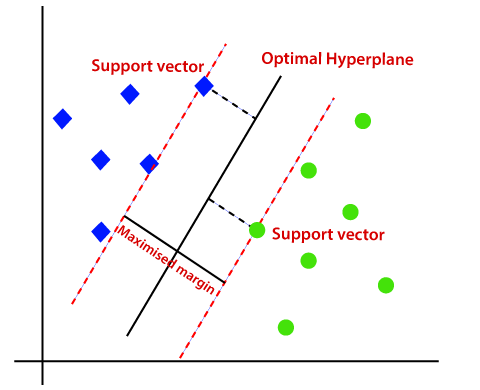

In [82]:
from sklearn.svm import SVC


In [90]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.52%


# Naive Bayes Algorithm

Naive Bayes Algorithm

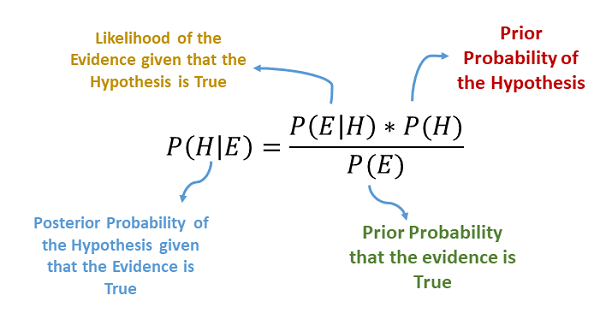

In [84]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


# Decision Tree Algorithm


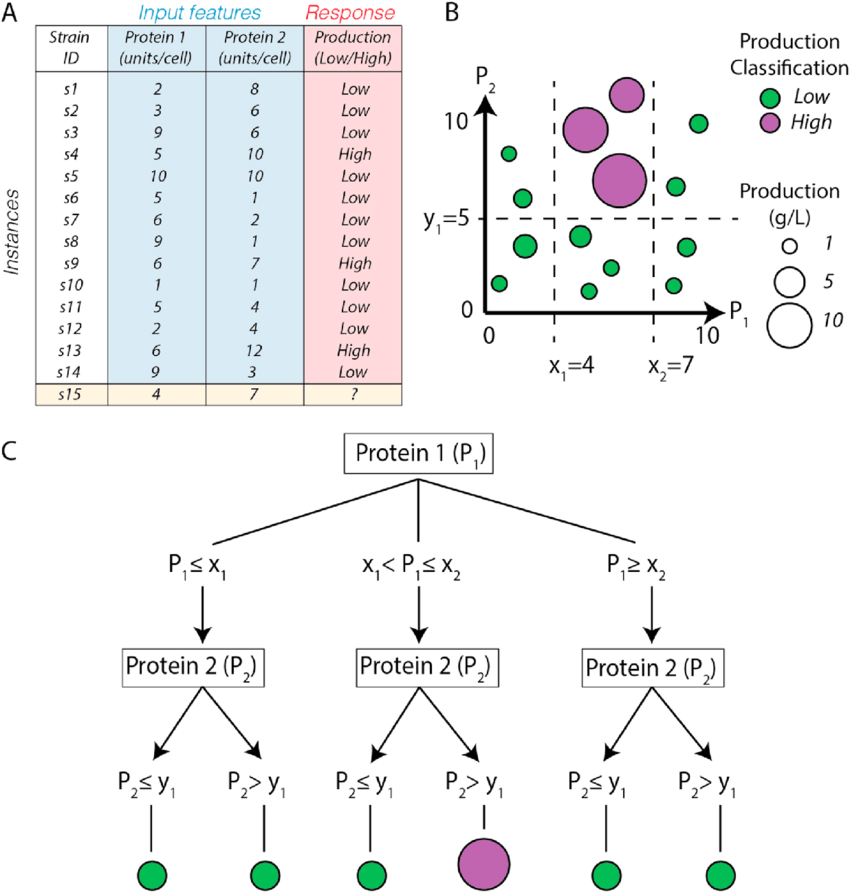

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.69%


# Random Forest Classification


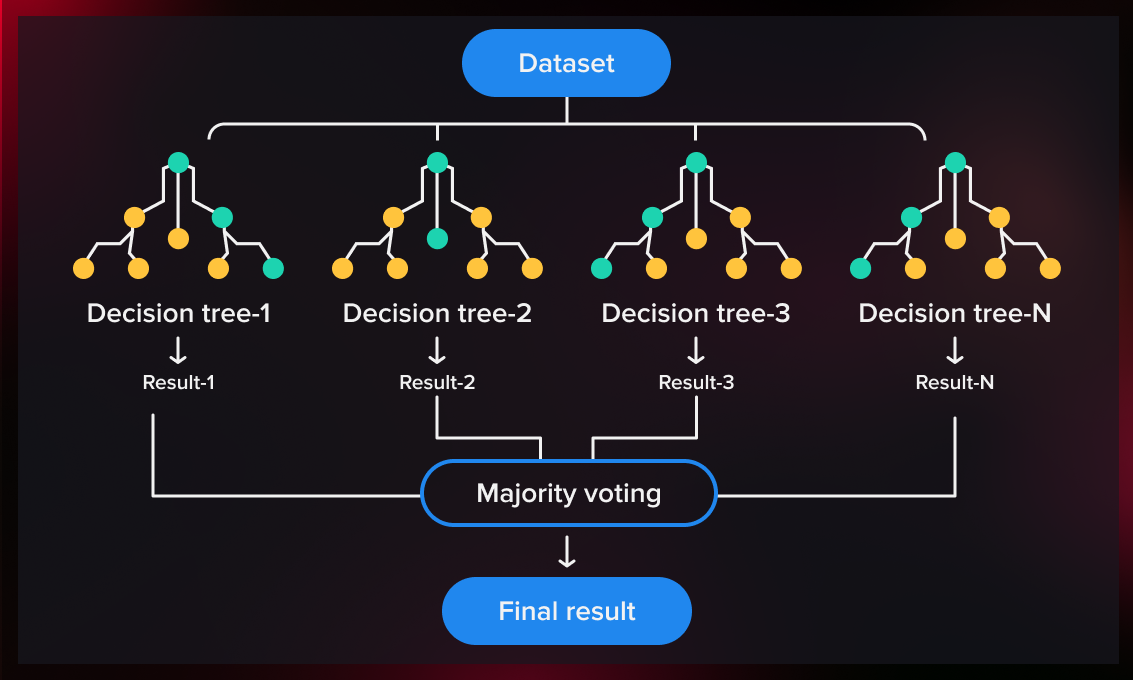

In [86]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


# Best Model

In [89]:
accuracies

{'Logistic Regression': 86.88524590163934,
 'KNN': 88.52459016393442,
 'SVM': 88.52459016393442,
 'Naive Bayes': 86.88524590163934,
 'Decision Tree': 78.68852459016394,
 'Random Forest': 88.52459016393442}